# Carga del DataSet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
import os
from tabulate import tabulate

In [ ]:
# data = pd.read_csv('/content/creditos_historicos.csv')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
ruta = "/content/drive/MyDrive/creditos_historicos.csv"
data= pd.read_csv(ruta)
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-9-3b2095cb5742>:5: DtypeWarning: Columns (13,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv(ruta)


,id_cliente,loan_status,loan_amnt,installment,term,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,next_pymnt_d,earliest_cr_line,mths_since_last_delinq,total_pymnt,recoveries,collection_recovery_fee,last_pymnt_d,settlement_status,application_type,tot_hi_cred_lim
0,0,Current,2500,84.92,36 months,Chef,10+ years,RENT,55000.0,Not Verified,...,Mar-2019,Apr-2001,NaN,167.020000,0.0,0.0,Feb-2019,NaN,Individual,60124.0
1,1,Current,30000,777.23,60 months,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,...,Mar-2019,Jun-1987,71.0,1507.110000,0.0,0.0,Feb-2019,NaN,Individual,372872.0
2,2,Current,5000,180.69,36 months,Administrative,6 years,MORTGAGE,59280.0,Source Verified,...,Mar-2019,Apr-2011,NaN,353.890000,0.0,0.0,Feb-2019,NaN,Individual,136927.0
3,3,Current,4000,146.51,36 months,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,...,Mar-2019,Feb-2006,NaN,286.710000,0.0,0.0,Feb-2019,NaN,Individual,385183.0
4,4,Current,30000,731.78,60 months,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,...,Mar-2019,Dec-2000,NaN,1423.210000,0.0,0.0,Feb-2019,NaN,Individual,157548.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260663,2260663,Current,12000,279.72,60 months,house keeper,10+ years,MORTGAGE,58000.0,Not Verified,...,Mar-2019,Jan-2004,NaN,5360.960000,0.0,0.0,Feb-2019,NaN,Individual,73948.0
2260664,2260664,Fully Paid,12000,358.01,60 months,Skilled Labor,< 1 year,MORTGAGE,30000.0,Not Verified,...,NaN,Mar-2003,13.0,14499.802172,0.0,0.0,Aug-2018,NaN,Joint App,382275.0
2260665,2260665,Current,10000,332.10,36 months,Teacher,10+ years,OWN,64000.0,Source Verified,...,Mar-2019,Feb-1995,NaN,5306.940000,0.0,0.0,Feb-2019,NaN,Individual,203417.0
2260666,2260666,Current,12000,327.69,60 months,NaN,NaN,RENT,60000.0,Not Verified,...,Mar-2019,Jul-2003,7.0,5207.290000,0.0,0.0,Feb-2019,NaN,Individual,118975.0


In [ ]:
# Análisis por tipo de variable
dtypes_count = data.dtypes.value_counts()
missing_counts = data.isnull().sum()
unique_counts = data.nunique()
print(tabulate(dtypes_count.items(), headers=['Tipo de Variable', 'Cantidad'], tablefmt='grid'))
print(tabulate(missing_counts.items(), headers=['Variable', 'Valores Faltantes'], tablefmt='grid'))
print(tabulate(unique_counts.items(), headers=['Variable', 'Valores Únicos'], tablefmt='grid'))


+--------------------+------------+
| Tipo de Variable   |   Cantidad |
+====================+============+
| object             |         11 |
+--------------------+------------+
| float64            |          9 |
+--------------------+------------+
| datetime64[ns]     |          3 |
+--------------------+------------+
+-------------------------+---------------------+
| Variable                |   Valores Faltantes |
+=========================+=====================+
| id_cliente              |                   0 |
+-------------------------+---------------------+
| loan_status             |                   0 |
+-------------------------+---------------------+
| loan_amnt               |                   0 |
+-------------------------+---------------------+
| installment             |                   0 |
+-------------------------+---------------------+
| term                    |                   0 |
+-------------------------+---------------------+
| emp_title               

In [ ]:
columnas_seleccionadas = ['loan_status', 'mths_since_last_delinq']
df_filtrado = data[data['mths_since_last_delinq'].isna()][columnas_seleccionadas]

In [ ]:
print(df_filtrado)

        loan_status  mths_since_last_delinq
0           Current                     NaN
2           Current                     NaN
3           Current                     NaN
4           Current                     NaN
5           Current                     NaN
...             ...                     ...
2260656  Fully Paid                     NaN
2260662     Current                     NaN
2260663     Current                     NaN
2260665     Current                     NaN
2260667     Current                     NaN

[1158502 rows x 2 columns]


In [ ]:
#Mostrar distribuciones de las variables cuanlitativas
for column in df_filtrado.select_dtypes(include=['object']).columns:
  print(f"\nVariable: {column}")
  value_counts = df_filtrado[column].value_counts()
  percentage = (value_counts / len(df_filtrado)) * 100
  df_counts = pd.concat([value_counts, percentage.round(1)], axis=1)
  df_counts.columns = ['Count', 'Percentage']
  print(df_counts)

NameError: name 'df_filtrado' is not defined

A continuación se presenta el Diccionario de Datos del conjunto de datos:
- Id_cliente: Identificador unico por cliente
- Loan_status: Estado del crédito
- Loan_amnt: El importe del préstamo solicitado por el prestatario. Si en algún momento el departamento de crédito reduce el importe del préstamo, se reflejará en este valor.
- Term: Plazo del préstamo. Los valores se expresan en meses y pueden ser 36 o 60.       Emp_title: Profesion del cliente
- Emp_length:Duración del empleo en años. Los valores posibles están entre 0 y 10, donde 0 significa menos de un año y 10 significa diez o más años.
- Home_ownership: tipo de propiedad de la vivienda
- Annual_inc: Ingreso anual del cliente
- Verification_status: Hace referencia a verificaciones que realiza el departamento de credito en relacion al ingreso del cliente.
- Purpose:  Proposito mencionado por el prestatario para la solicitud de préstamo.
- Addr_state: Estado USA en el que se encuentra el cliente.
- Delinq_2yrs: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
- Next_pymnt_d: Proxima fecha de pago
- Earliest_cr_line: The date the borrower's earliest reported credit line was opened
- Mths_since_last_delinq: The number of months since the borrower's last delinquency.
- Total_pymnt:Pago cuota del préstamo.
- Recoveries: Monto recuperado luego de un valor impago.
- Collection_recovery_fee: Costo generado por la recuperación
- Last_pymnt_d: Fecha de último pago.
- Settlement_status: Estado del cliente
- Application_type: Indicates whether the loan is an individual application or a joint application with two co-borrowers
- Tot_hi_cred_lim: Total high credit/credit limit
- Collections fee : Monto $ por el proceso de cobranza
- Recovery: Monto que logramos recuperar luego de retrasos
- Installment: La cuota mensual que debe pagar el prestatario si se origina el préstamo.


# Análisis Exploratorio

In [ ]:
pd.set_option("display.max_columns", 500)
data.head()


,id_cliente,loan_status,loan_amnt,installment,term,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,delinq_2yrs,next_pymnt_d,earliest_cr_line,mths_since_last_delinq,total_pymnt,recoveries,collection_recovery_fee,last_pymnt_d,settlement_status,application_type,tot_hi_cred_lim
0,0,Current,2500,84.92,36 months,Chef,10+ years,RENT,55000.0,Not Verified,debt_consolidation,NY,0.0,Mar-2019,Apr-2001,NaN,167.02,0.0,0.0,Feb-2019,NaN,Individual,60124.0
1,1,Current,30000,777.23,60 months,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,debt_consolidation,LA,0.0,Mar-2019,Jun-1987,71.0,1507.11,0.0,0.0,Feb-2019,NaN,Individual,372872.0
2,2,Current,5000,180.69,36 months,Administrative,6 years,MORTGAGE,59280.0,Source Verified,debt_consolidation,MI,0.0,Mar-2019,Apr-2011,NaN,353.89,0.0,0.0,Feb-2019,NaN,Individual,136927.0
3,3,Current,4000,146.51,36 months,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,debt_consolidation,WA,0.0,Mar-2019,Feb-2006,NaN,286.71,0.0,0.0,Feb-2019,NaN,Individual,385183.0
4,4,Current,30000,731.78,60 months,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,debt_consolidation,MD,0.0,Mar-2019,Dec-2000,NaN,1423.21,0.0,0.0,Feb-2019,NaN,Individual,157548.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 23 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   id_cliente               int64  
 1   loan_status              object 
 2   loan_amnt                int64  
 3   installment              float64
 4   term                     object 
 5   emp_title                object 
 6   emp_length               object 
 7   home_ownership           object 
 8   annual_inc               float64
 9   verification_status      object 
 10  purpose                  object 
 11  addr_state               object 
 12  delinq_2yrs              float64
 13  next_pymnt_d             object 
 14  earliest_cr_line         object 
 15  mths_since_last_delinq   float64
 16  total_pymnt              float64
 17  recoveries               float64
 18  collection_recovery_fee  float64
 19  last_pymnt_d             object 
 20  settlement_status        object 
 21  applicat

In [ ]:
# Convertir a formatos correspondientes
data['id_cliente'] = data['id_cliente'].astype(str)
data['loan_amnt']= data['loan_amnt'].astype(float)
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%Y', errors='coerce')
data['last_pymnt_d'] = pd.to_datetime(data['last_pymnt_d'], format='%b-%Y', errors='coerce')
data['next_pymnt_d'] = pd.to_datetime(data['next_pymnt_d'], format='%b-%Y', errors='coerce')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 23 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   id_cliente               object        
 1   loan_status              object        
 2   loan_amnt                float64       
 3   installment              float64       
 4   term                     object        
 5   emp_title                object        
 6   emp_length               object        
 7   home_ownership           object        
 8   annual_inc               float64       
 9   verification_status      object        
 10  purpose                  object        
 11  addr_state               object        
 12  delinq_2yrs              float64       
 13  next_pymnt_d             datetime64[ns]
 14  earliest_cr_line         datetime64[ns]
 15  mths_since_last_delinq   float64       
 16  total_pymnt              float64       
 17  recoveries               fl

In [ ]:
#Mostrar valores únicos de las variables cualitativas
for column in data.select_dtypes(include=['object']).columns:
  print(f"\nVariable: {column}")
  categorias = data[column].unique()
  print(categorias)


Variable: id_cliente
['0' '1' '2' ... '2260665' '2260666' '2260667']

Variable: loan_status
['Current' 'Fully Paid' 'Late (31-120 days)' 'In Grace Period'
 'Charged Off' 'Late (16-30 days)' 'Default'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']

Variable: term
[' 36 months' ' 60 months']

Variable: emp_title
['Chef' 'Postmaster ' 'Administrative' ... 'Sales, Estimating & Design'
 'Acft mechanic' 'BABYSITTER']

Variable: emp_length
['10+ years' '6 years' '4 years' '< 1 year' '2 years' '9 years' nan
 '5 years' '3 years' '7 years' '1 year' '8 years']

Variable: home_ownership
['RENT' 'MORTGAGE' 'OWN' 'ANY' 'NONE' 'OTHER']

Variable: verification_status
['Not Verified' 'Source Verified' 'Verified']

Variable: purpose
['debt_consolidation' 'credit_card' 'house' 'car' 'other' 'vacation'
 'home_improvement' 'small_business' 'major_purchase' 'medical'
 'renewable_energy' 'moving' 'wedding' 'educational']

Variable: addr_state
['

In [ ]:
#Mostrar distribuciones de las variables cuanlitativas
for column in data.select_dtypes(include=['object']).columns:
  print(f"\nVariable: {column}")
  value_counts = data[column].value_counts()
  percentage = (value_counts / len(data)) * 100
  df_counts = pd.concat([value_counts, percentage.round(1)], axis=1)
  df_counts.columns = ['Count', 'Percentage']
  print(df_counts)


Variable: id_cliente
            Count  Percentage
id_cliente                   
0               1         0.0
1507114         1         0.0
1507108         1         0.0
1507109         1         0.0
1507110         1         0.0
...           ...         ...
753550          1         0.0
753549          1         0.0
753548          1         0.0
753547          1         0.0
2260667         1         0.0

[2260668 rows x 2 columns]

Variable: loan_status
                                                      Count  Percentage
loan_status                                                            
Fully Paid                                          1041952        46.1
Current                                              919695        40.7
Charged Off                                          261655        11.6
Late (31-120 days)                                    21897         1.0
In Grace Period                                        8952         0.4
Late (16-30 days)                

In [ ]:
#Mostrar distribuciones de las variables cuantitativas
data.describe().round(2)

,loan_amnt,installment,annual_inc,delinq_2yrs,next_pymnt_d,earliest_cr_line,mths_since_last_delinq,total_pymnt,recoveries,collection_recovery_fee,last_pymnt_d,tot_hi_cred_lim
count,2260668.00,2260668.00,2.260664e+06,2260639.00,957061,2260639,1102166.00,2260668.00,2260668.00,2260668.00,2258242,2190392.00
mean,15046.93,445.81,7.799243e+04,0.31,2019-02-21 00:47:53.587367168,1999-12-10 16:39:39.736349824,34.54,11824.03,136.07,22.59,2017-12-07 15:35:59.414625536,178242.75
min,500.00,4.93,0.000000e+00,0.00,2008-01-01 00:00:00,1933-03-01 00:00:00,0.00,0.00,0.00,0.00,2007-12-01 00:00:00,0.00
25%,8000.00,251.65,4.600000e+04,0.00,2019-03-01 00:00:00,1995-11-01 00:00:00,16.00,4272.58,0.00,0.00,2017-03-01 00:00:00,50731.00
50%,12900.00,377.99,6.500000e+04,0.00,2019-03-01 00:00:00,2001-04-01 00:00:00,31.00,9060.87,0.00,0.00,2018-08-01 00:00:00,114298.50
75%,20000.00,593.32,9.300000e+04,0.00,2019-03-01 00:00:00,2005-05-01 00:00:00,50.00,16707.97,0.00,0.00,2019-02-01 00:00:00,257755.00
max,40000.00,1719.83,1.100000e+08,58.00,2019-04-01 00:00:00,2015-11-01 00:00:00,226.00,63296.88,39859.55,7174.72,2019-02-01 00:00:00,9999999.00
std,9190.25,267.17,1.126962e+05,0.87,NaN,NaN,21.90,9889.60,725.83,127.11,NaN,181574.81


********************************************Preguntar, algunos histogramas siento q son medios raros, dejamos todos los histogramas?**********************************************

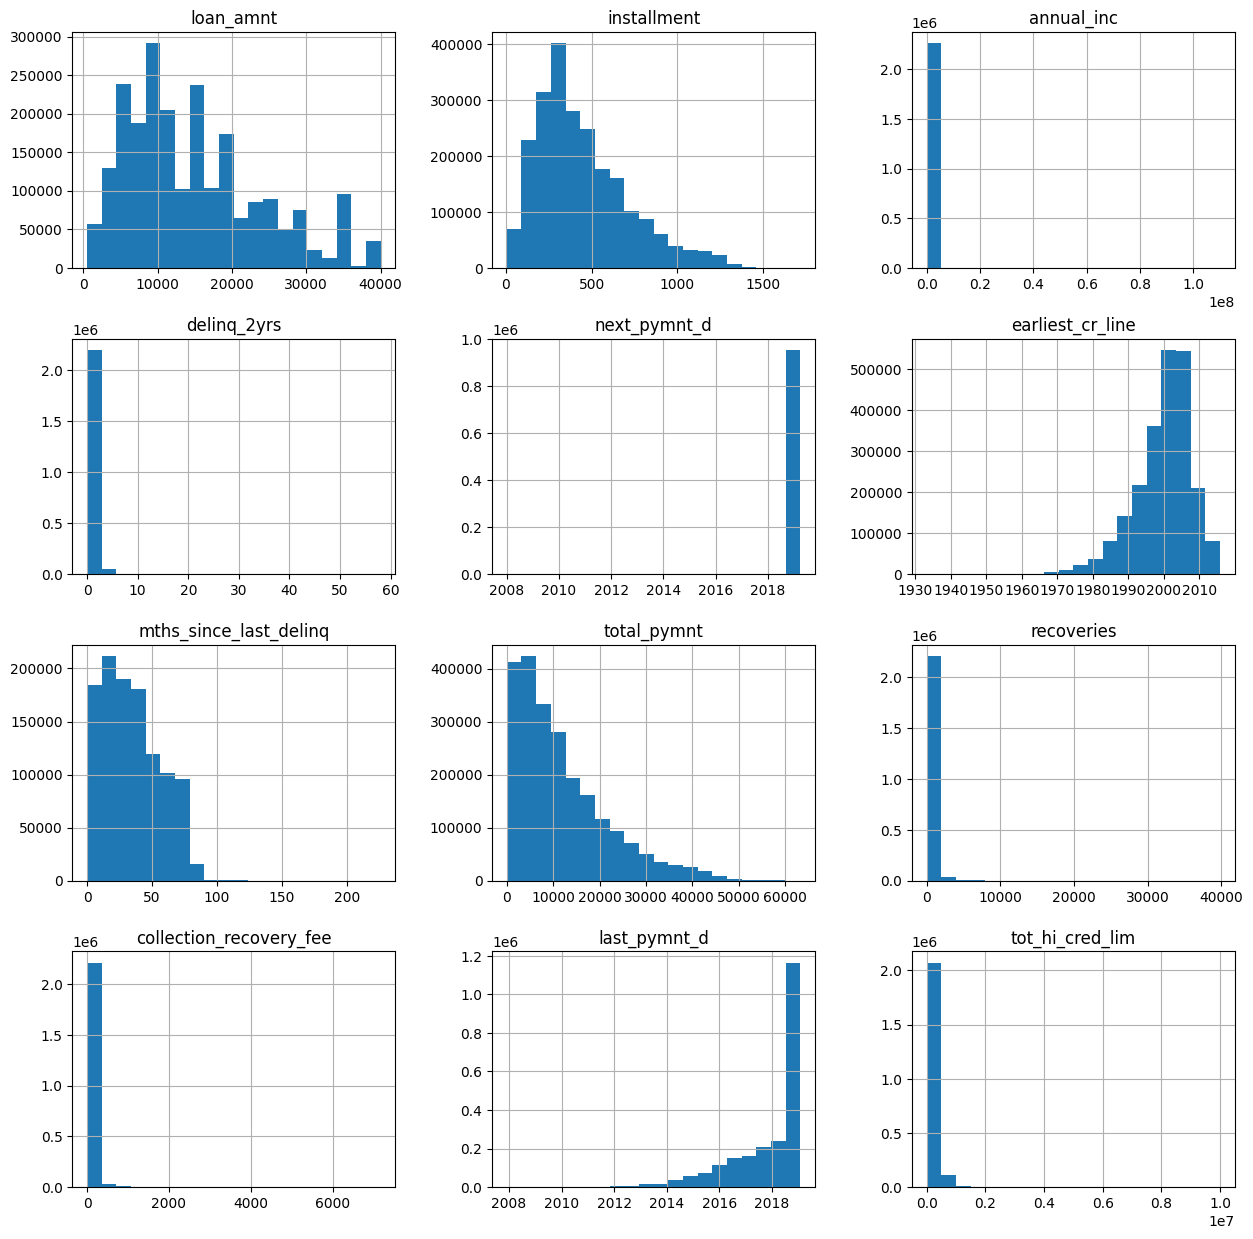

In [ ]:
#Histogramas
data.hist(bins=20, figsize=(15,15))
plt.show()

no todos las diagramas se ven visualmente bien, los dejamos todos???

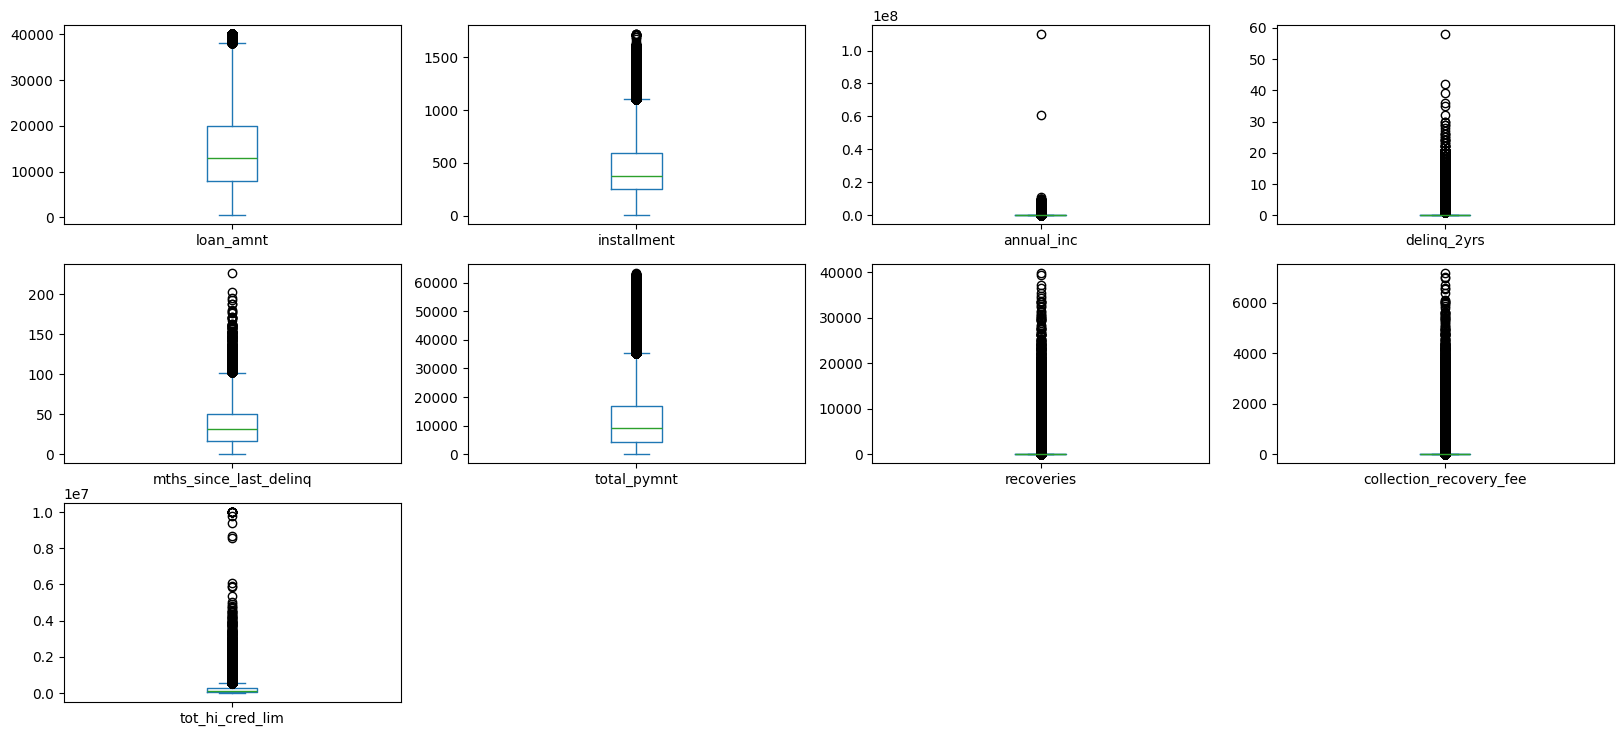

In [ ]:
#Boxplots para cada variable numérica
data.plot(kind='box', subplots=True, layout=(5,4), figsize=(20,15))
plt.show()

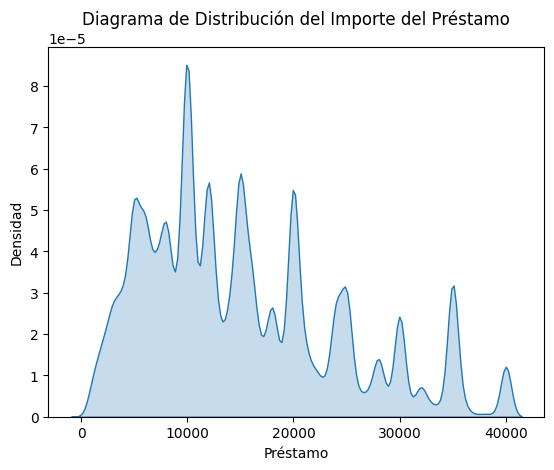

In [ ]:
sns.kdeplot(data=data, x="loan_amnt", fill=True)

plt.title("Diagrama de Distribución del Importe del Préstamo")
plt.xlabel("Préstamo")
plt.ylabel("Densidad")
plt.show()

cambiarlo mas abajito****

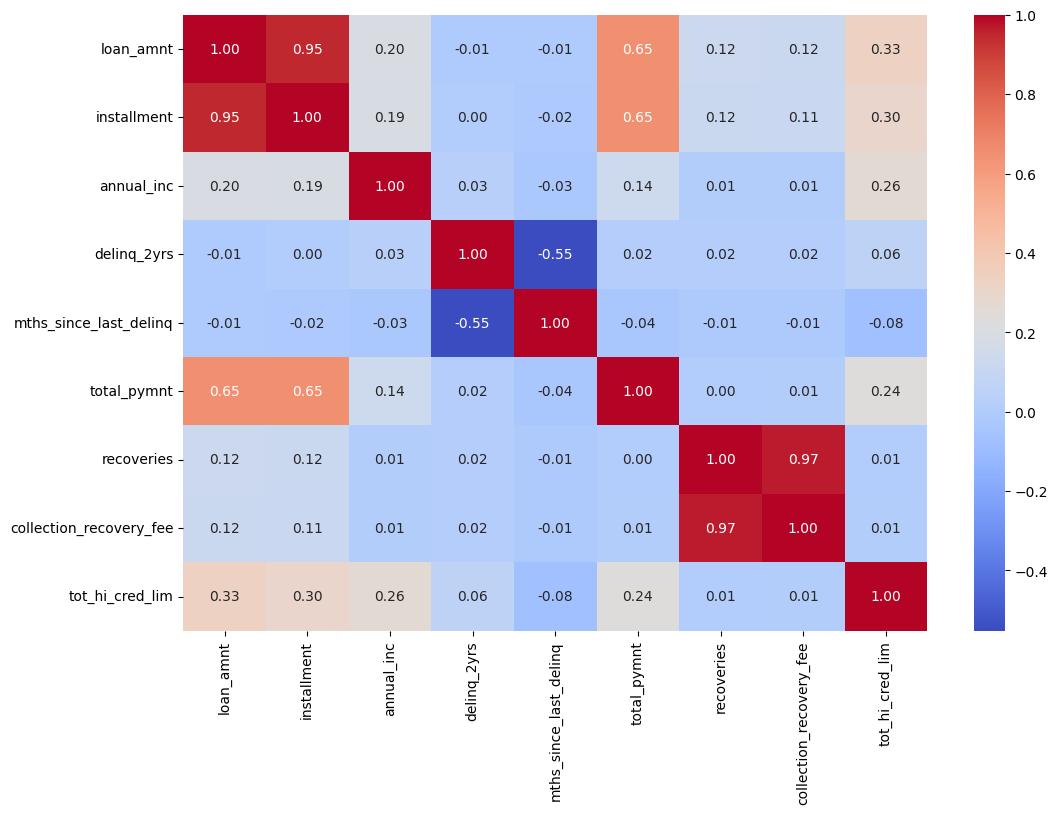

In [ ]:
# Visualización de correlaciones entre variables numéricas
numerical_data = data.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Limpieza de Datos

In [ ]:
#Nuevo dataset con los malos pagadores para la limpieza
df=data

In [ ]:
#Duplicados en filas
print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())


Número de filas duplicadas:
0


In [ ]:
# Verificar valores nulos
def analizar_valores_faltantes(data):
    valores_faltantes = df.isnull().sum()
    porcentaje = (valores_faltantes / len(df)) * 100

    datos_faltantes = pd.DataFrame({
        'Valores Faltantes': valores_faltantes,
        'Porcentaje': porcentaje
    })

    return datos_faltantes.sort_values('Porcentaje', ascending=False)

print("Análisis de Valores Faltantes Inicial:")
print(analizar_valores_faltantes(df))

Análisis de Valores Faltantes Inicial:
                         Valores Faltantes  Porcentaje
settlement_status                  2227612   98.537777
next_pymnt_d                       1303607   57.664681
mths_since_last_delinq             1158502   51.246003
emp_title                           166969    7.385826
emp_length                          146907    6.498389
tot_hi_cred_lim                      70276    3.108639
last_pymnt_d                          2426    0.107313
earliest_cr_line                        29    0.001283
delinq_2yrs                             29    0.001283
annual_inc                               4    0.000177
application_type                         0    0.000000
collection_recovery_fee                  0    0.000000
recoveries                               0    0.000000
total_pymnt                              0    0.000000
id_cliente                               0    0.000000
loan_status                              0    0.000000
purpose                   

In [ ]:
df.drop(['settlement_status', 'earliest_cr_line', 'last_pymnt_d','next_pymnt_d'], axis=1, inplace=True)

**El campo emp_title (7% valores faltantes**), nos indica la Profesion del cliente, para lo cual, se va a imputar una categoría llamada "UNKNOWN_OCCUPATION"




In [ ]:
df['has_job_info'] = df['emp_title'].notna().astype(int)
df['emp_title'] = df['emp_title'].fillna('UNKNOWN_OCCUPATION')


**El campo emp_length  (6.32% valores faltantes**), nos indica la duración del empleo en años. Los valores posibles están entre 0 y 10, donde 0 significa menos de un año y 10 significa diez o más años, por lo cual:

- Se convertirá la columna a valores entre 0 y 10
- Se creará una columna informativa
- Se imputará por:
  - Mediana por emp_title (si disponible)
  - Mediana general (si no hay emp_title)

In [ ]:
def convert_emp_length(value):
    if value == '< 1 year':
        return 0
    elif value == '1 year':
        return 1
    elif value == '2 years':
        return 2
    elif value == '3 years':
        return 3
    elif value == '4 years':
        return 4
    elif value == '5 years':
        return 5
    elif value == '6 years':
        return 6
    elif value == '7 years':
        return 7
    elif value == '8 years':
        return 8
    elif value == '9 years':
        return 9
    elif value == '10+ years':
        return 10
    else:
        return np.nan  # Si el valor es nulo o no está en los casos anteriores, asignamos NaN

  # Columna informativa
  df['has_emp_length_info'] = df['emp_length'].notna().astype(int)
  # Transformar columna 'emp_length' a numérico
  df['emp_length'] = df['emp_length'].apply(convert_emp_length)

  # Imputación por emp_title
  emp_title_medians = df.groupby('emp_title')['emp_length'].transform('median')
  df['emp_length'].fillna(emp_title_medians, inplace=True)

  # Imputación por la mediana a los restantes
  df['emp_length'] = df['emp_length'].fillna(df['emp_length'].median())

<ipython-input-23-7cf960e8b618>:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['emp_length'].fillna(emp_title_medians, inplace=True)


**El campo tot_hi_cred_lim (2.7% valores faltantes**), nos indica el Límite de crédito/crédito total alto, por lo cual:

- Se creará una columna informativa
- Se imputará por Mediana general

In [ ]:
df['has_credit_limit_info'] = df['tot_hi_cred_lim'].notna().astype(int)

# Imputación por la mediana general
df['tot_hi_cred_lim'] = df['tot_hi_cred_lim'].fillna(df['tot_hi_cred_lim'].median())


**El campo delinq_2yrs (0.0004% valores faltantes**), nos indica el número de incidencias de morosidad con más de 30 días de retraso en el pago en el expediente crediticio del prestatario durante los últimos 2 años, para lo cual, se va imputar valores faltantes con 0

In [ ]:
df['delinq_2yrs'] = df['delinq_2yrs'].fillna(0)

**El campo mths_since_last_delinq (21.88% valores faltantes**), nos indica el número de meses desde la última morosidad del prestatario, para lo cual, NaN podría indicar ausencia de delinquency:

- Si delinq_2yrs = 0: Imputar con el - 1 (Claramente distinto de valores válidos)
- Si delinq_2yrs > 0: Imputar con la mediana de los casos con delinquency

In [ ]:
df['has_delinquency_history'] = (df['delinq_2yrs'] > 0).astype(int)

# Si delinq_2yrs == 0, imputar con -1
df.loc[df['delinq_2yrs'] == 0, 'mths_since_last_delinq'] = 227

# Si delinq_2yrs > 0, imputar con la mediana de los casos con delinquency
delinquent_cases = df[df['delinq_2yrs'] > 0]
median_delinquent = delinquent_cases['mths_since_last_delinq'].median()

# Imputar con la mediana para los casos con delinquency (que tienen NaN en mths_since_last_delinq)
df.loc[(df['delinq_2yrs'] > 0) & df['mths_since_last_delinq'].isna(), 'mths_since_last_delinq'] = median_delinquent


In [ ]:
df['annual_inc'] = df['annual_inc'].fillna(df['annual_inc'].median())

In [ ]:
# Verificar valores nulos
def analizar_valores_faltantes(data):
    valores_faltantes = df.isnull().sum()
    porcentaje = (valores_faltantes / len(df)) * 100

    datos_faltantes = pd.DataFrame({
        'Valores Faltantes': valores_faltantes,
        'Porcentaje': porcentaje
    })

    return datos_faltantes.sort_values('Porcentaje', ascending=False)

print("Análisis de Valores Faltantes Final:")
print(analizar_valores_faltantes(df))

Análisis de Valores Faltantes Final:
                         Valores Faltantes  Porcentaje
id_cliente                               0         0.0
delinq_2yrs                              0         0.0
has_credit_limit_info                    0         0.0
has_emp_length_info                      0         0.0
has_job_info                             0         0.0
tot_hi_cred_lim                          0         0.0
application_type                         0         0.0
collection_recovery_fee                  0         0.0
recoveries                               0         0.0
total_pymnt                              0         0.0
mths_since_last_delinq                   0         0.0
addr_state                               0         0.0
loan_status                              0         0.0
purpose                                  0         0.0
verification_status                      0         0.0
annual_inc                               0         0.0
home_ownership              

# Definición de mal pagador

Un cliente será considerado mal pagador si cumple AL MENOS UNO de estos criterios:

- **Por estado del préstamo (loan_status):**
  - Se encuentra en estado "Charged Off"
  - Se encuentra en estado "Default"
  - Se encuentra en estado "Late (31-120 days)"


- **Por comportamiento histórico:**
  - delinq_2yrs >0  
  - mths_since_last_delinq ≤ 16




In [ ]:
# def mal_pagador(row):
#     # Por estado del préstamo
#     loan_status_mal = row['loan_status'] in ['Charged Off', 'Default', 'Late (31-120 days)']

#     # Por comportamiento histórico
#     comportamiento_historico_mal = row['delinq_2yrs'] > 0 or row['mths_since_last_delinq'] <=16


#     # Un cliente es mal pagador si cumple al menos uno de los criterios
#     return loan_status_mal or comportamiento_historico_mal


In [ ]:
def mal_pagador(row):
    # Por estado del préstamo
    loan_status_mal = row['loan_status'] in ['Charged Off', 'Default', 'Late (31-120 days)']

    # Por comportamiento histórico
    comportamiento_historico_mal = row['delinq_2yrs'] > 0 or row['mths_since_last_delinq'] <= 16

    # Un cliente es "bad" si cumple al menos uno de los criterios, de lo contrario es "good"
    if loan_status_mal or comportamiento_historico_mal:
        return "bad"
    else:
        return "good"


In [ ]:
df["Target"] = data.apply(lambda x: mal_pagador(x), axis=1)

In [ ]:
df["Target"].value_counts(normalize=True)

,proportion
Target,
good,0.714184
bad,0.285816


In [ ]:
# total_registros = len(data)
# total_malos = data['Target'].sum()
# porcentaje_malos = (total_malos / total_registros * 100).round(2)
# print(f"Total de registros: {total_registros} personas")
# print(f"Total de malos pagadores: {total_malos} personas")
# print(f"Porcentaje de malos pagadores: {porcentaje_malos}%")

# por_loanstatus= data[data['loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)'])]['Target'].sum()
# por_delinq= data[data['delinq_2yrs'] >= 2]['Target'].sum()+ data[data['mths_since_last_delinq'] <= 16]['Target'].sum()

# print(f"Total de malos pagadores por estado de préstamo: {por_loanstatus} personas")
# print(f"Total de malos pagadores por comportamiento histórico: {por_delinq} personas")

# Feature transformation


**Ratios Financieros:**

1. Capacidad de pago = loan_amnt/annual_inc
2. Ratio_endeudamiento = installment /(annual_inc/12)
3. Uso del crédito = loan_amnt/tot_hi_cred_lim
4. Tasa de recuperación = recoveries/loan_amnt


**Indicadores de Comportamiento**
1. Alto endeudamiento = Capacidad de pago > mediana (Capacidad de pago)
2. Alta utilización = Uso del crédito > 0,8
3. Morosidad reciente = mths_since_last_delinq <=6
4. Score de Riesgo = Alto endeudamiento + Alta utilización + Morosidad reciente

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 25 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   id_cliente               object 
 1   loan_status              object 
 2   loan_amnt                float64
 3   installment              float64
 4   term                     object 
 5   emp_title                object 
 6   emp_length               float64
 7   home_ownership           object 
 8   annual_inc               float64
 9   verification_status      object 
 10  purpose                  object 
 11  addr_state               object 
 12  delinq_2yrs              float64
 13  mths_since_last_delinq   float64
 14  total_pymnt              float64
 15  recoveries               float64
 16  collection_recovery_fee  float64
 17  application_type         object 
 18  tot_hi_cred_lim          float64
 19  has_job_info             int64  
 20  has_emp_length_info      int64  
 21  has_cred

In [ ]:
df["loan_amnt"].min()

500.0

In [ ]:
def prestamo(x):
    if x["loan_amnt"] >= 500 and x["loan_amnt"] < 10000:
        return "[0.5 a 10)"
    elif x["loan_amnt"] >= 10000 and x["loan_amnt"] < 20000:
        return "[10 a 20)"
    elif x["loan_amnt"] >= 20000 and x["loan_amnt"] < 30000:
        return "[20 a 30)"
    elif x["loan_amnt"] >= 30000:
        return "más de 30"

In [ ]:
data["inter_prestamo"]=data.apply(lambda x: prestamo(x),axis=1)

In [ ]:
data["inter_prestamo"] = pd.Categorical(
    data["inter_prestamo"],
    categories=["[0.5 a 10)", "[10 a 20)", "[20 a 30)", "más de 30"],
    ordered=True
)

# Usar value_counts() y respetar el orden
value_counts_ordered = data["inter_prestamo"].value_counts(sort=False)
value_counts_ordered

,count
inter_prestamo,
[0.5 a 10),710061
[10 a 20),882505
[20 a 30),436259
más de 30,231843


<ipython-input-36-5faf95742f89>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(['inter_prestamo', 'Target']).size().unstack(fill_value=0)


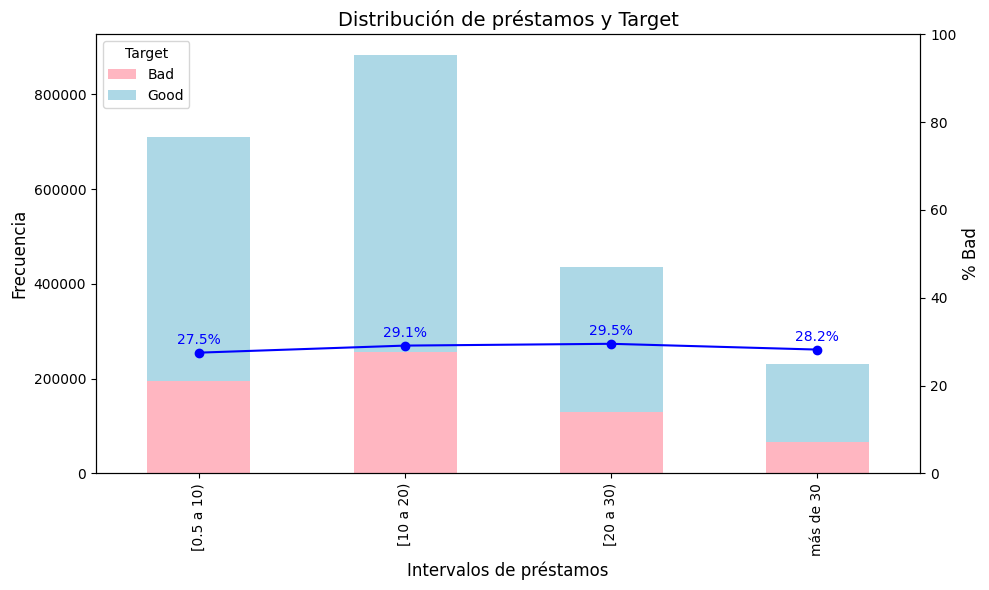

In [ ]:
# Agrupar los datos por categoría e intervalo
grouped_data = data.groupby(['inter_prestamo', 'Target']).size().unstack(fill_value=0)

# Calcular porcentajes de "bad"
grouped_data['bad_percentage'] = grouped_data['bad'] / grouped_data.sum(axis=1) * 100

# Colores pastel
colors = ['lightpink', 'lightblue']

# Crear gráfico de barras apiladas
fig, ax1 = plt.subplots(figsize=(10, 6))
grouped_data[['bad', 'good']].plot(kind='bar', stacked=True, color=colors, ax=ax1)

# Configurar ejes del gráfico de barras
ax1.set_ylabel('Frecuencia', fontsize=12)
ax1.set_xlabel('Intervalos de préstamos', fontsize=12)
ax1.set_title('Distribución de préstamos y Target', fontsize=14)
ax1.legend(['Bad', 'Good'], title='Target', loc='upper left')

# Crear un segundo eje Y para la línea de porcentaje
ax2 = ax1.twinx()
ax2.plot(grouped_data.index, grouped_data['bad_percentage'], color='blue', marker='o', label='% Bad')
ax2.set_ylabel('% Bad', fontsize=12)
ax2.set_ylim(0, 100)

# Añadir etiquetas del porcentaje en la línea
for i, txt in enumerate(grouped_data['bad_percentage']):
    ax2.text(i, txt + 2, f'{txt:.1f}%', ha='center', color='blue', fontsize=10)

# Ajustar visualización
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
pd.crosstab(data["home_ownership"], data['Target'], normalize='index')*100

Target,bad,good
home_ownership,,
ANY,20.582329,79.417671
MORTGAGE,29.231454,70.768546
NONE,31.481481,68.518519
OTHER,30.219780,69.780220
OWN,28.703810,71.296190
RENT,27.748347,72.251653


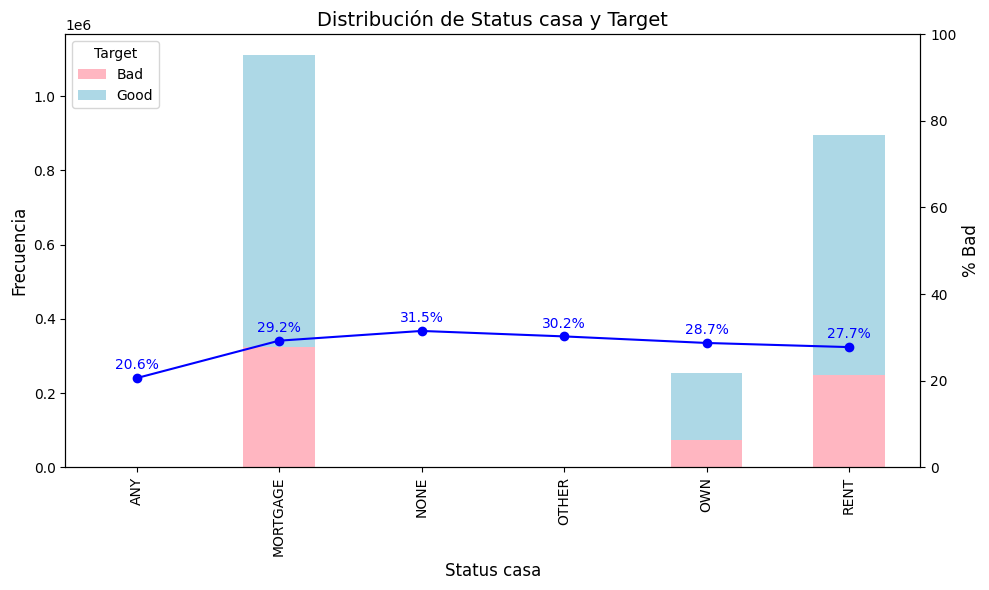

In [ ]:
# Agrupar los datos por categoría e intervalo
grouped_data = data.groupby(['home_ownership', 'Target']).size().unstack(fill_value=0)

# Calcular porcentajes de "bad"
grouped_data['bad_percentage'] = grouped_data['bad'] / grouped_data.sum(axis=1) * 100

# Colores pastel
colors = ['lightpink', 'lightblue']

# Crear gráfico de barras apiladas
fig, ax1 = plt.subplots(figsize=(10, 6))
grouped_data[['bad', 'good']].plot(kind='bar', stacked=True, color=colors, ax=ax1)

# Configurar ejes del gráfico de barras
ax1.set_ylabel('Frecuencia', fontsize=12)
ax1.set_xlabel('Status casa', fontsize=12)
ax1.set_title('Distribución de Status casa y Target', fontsize=14)
ax1.legend(['Bad', 'Good'], title='Target', loc='upper left')

# Crear un segundo eje Y para la línea de porcentaje
ax2 = ax1.twinx()
ax2.plot(grouped_data.index, grouped_data['bad_percentage'], color='blue', marker='o', label='% Bad')
ax2.set_ylabel('% Bad', fontsize=12)
ax2.set_ylim(0, 100)

# Añadir etiquetas del porcentaje en la línea
for i, txt in enumerate(grouped_data['bad_percentage']):
    ax2.text(i, txt + 2, f'{txt:.1f}%', ha='center', color='blue', fontsize=10)

# Ajustar visualización
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


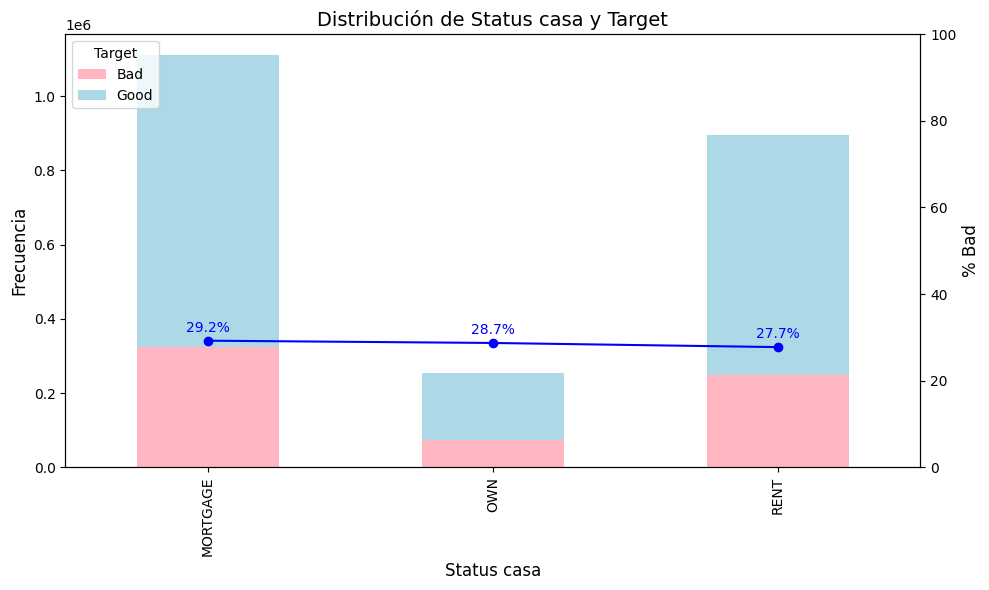

In [ ]:
# Filtrar las categorías deseadas
filtered_data = grouped_data.loc[['MORTGAGE', 'OWN', 'RENT']]

# Crear gráfico de barras apiladas
fig, ax1 = plt.subplots(figsize=(10, 6))
filtered_data[['bad', 'good']].plot(kind='bar', stacked=True, color=colors, ax=ax1)

# Configurar ejes del gráfico de barras
ax1.set_ylabel('Frecuencia', fontsize=12)
ax1.set_xlabel('Status casa', fontsize=12)
ax1.set_title('Distribución de Status casa y Target', fontsize=14)
ax1.legend(['Bad', 'Good'], title='Target', loc='upper left')

# Crear un segundo eje Y para la línea de porcentaje
ax2 = ax1.twinx()
ax2.plot(filtered_data.index, filtered_data['bad_percentage'], color='blue', marker='o', label='% Bad')
ax2.set_ylabel('% Bad', fontsize=12)
ax2.set_ylim(0, 100)

# Añadir etiquetas del porcentaje en la línea
for i, txt in enumerate(filtered_data['bad_percentage']):
    ax2.text(i, txt + 2, f'{txt:.1f}%', ha='center', color='blue', fontsize=10)

# Ajustar visualización
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 25 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   id_cliente               object  
 1   loan_status              object  
 2   loan_amnt                float64 
 3   installment              float64 
 4   term                     object  
 5   emp_title                object  
 6   emp_length               float64 
 7   home_ownership           object  
 8   annual_inc               float64 
 9   verification_status      object  
 10  purpose                  object  
 11  addr_state               object  
 12  delinq_2yrs              float64 
 13  mths_since_last_delinq   float64 
 14  total_pymnt              float64 
 15  recoveries               float64 
 16  collection_recovery_fee  float64 
 17  application_type         object  
 18  tot_hi_cred_lim          float64 
 19  has_job_info             int64   
 20  has_emp_length_info     

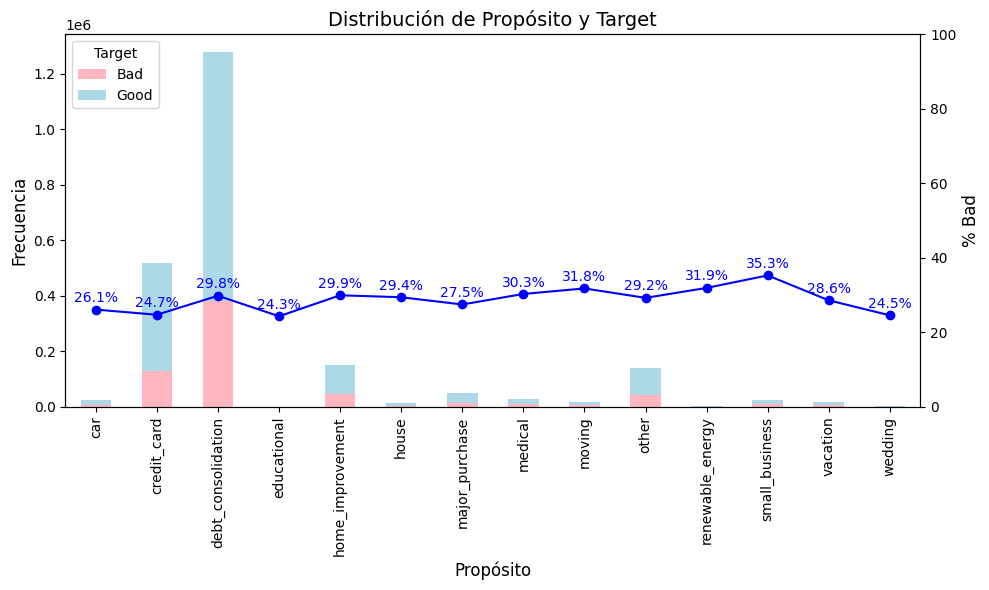

In [ ]:
# Agrupar los datos por categoría e intervalo
grouped_data = data.groupby(['purpose', 'Target']).size().unstack(fill_value=0)

# Calcular porcentajes de "bad"
grouped_data['bad_percentage'] = grouped_data['bad'] / grouped_data.sum(axis=1) * 100

# Colores pastel
colors = ['lightpink', 'lightblue']

# Crear gráfico de barras apiladas
fig, ax1 = plt.subplots(figsize=(10, 6))
grouped_data[['bad', 'good']].plot(kind='bar', stacked=True, color=colors, ax=ax1)

# Configurar ejes del gráfico de barras
ax1.set_ylabel('Frecuencia', fontsize=12)
ax1.set_xlabel('Propósito', fontsize=12)
ax1.set_title('Distribución de Propósito y Target', fontsize=14)
ax1.legend(['Bad', 'Good'], title='Target', loc='upper left')

# Crear un segundo eje Y para la línea de porcentaje
ax2 = ax1.twinx()
ax2.plot(grouped_data.index, grouped_data['bad_percentage'], color='blue', marker='o', label='% Bad')
ax2.set_ylabel('% Bad', fontsize=12)
ax2.set_ylim(0, 100)

# Añadir etiquetas del porcentaje en la línea
for i, txt in enumerate(grouped_data['bad_percentage']):
    ax2.text(i, txt + 2, f'{txt:.1f}%', ha='center', color='blue', fontsize=10)

# Ajustar visualización
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


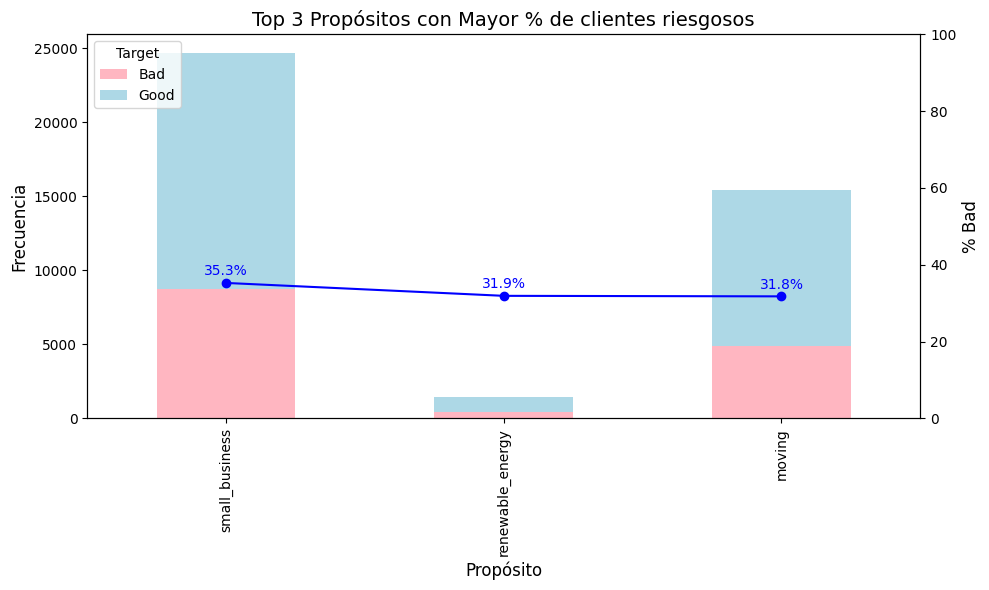

In [ ]:
# Ordenar los datos por el porcentaje de "bad" en orden descendente
top_5_bad = grouped_data.sort_values(by='bad_percentage', ascending=False).head(3)

# Crear gráfico de barras apiladas para los top 5
fig, ax1 = plt.subplots(figsize=(10, 6))
top_5_bad[['bad', 'good']].plot(kind='bar', stacked=True, color=colors, ax=ax1)

# Configurar ejes del gráfico de barras
ax1.set_ylabel('Frecuencia', fontsize=12)
ax1.set_xlabel('Propósito', fontsize=12)
ax1.set_title('Top 3 Propósitos con Mayor % de clientes riesgosos', fontsize=14)
ax1.legend(['Bad', 'Good'], title='Target', loc='upper left')

# Crear un segundo eje Y para la línea de porcentaje
ax2 = ax1.twinx()
ax2.plot(top_5_bad.index, top_5_bad['bad_percentage'], color='blue', marker='o', label='% Bad')
ax2.set_ylabel('% Bad', fontsize=12)
ax2.set_ylim(0, 100)

# Añadir etiquetas del porcentaje en la línea
for i, txt in enumerate(top_5_bad['bad_percentage']):
    ax2.text(i, txt + 2, f'{txt:.1f}%', ha='center', color='blue', fontsize=10)

# Ajustar visualización
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


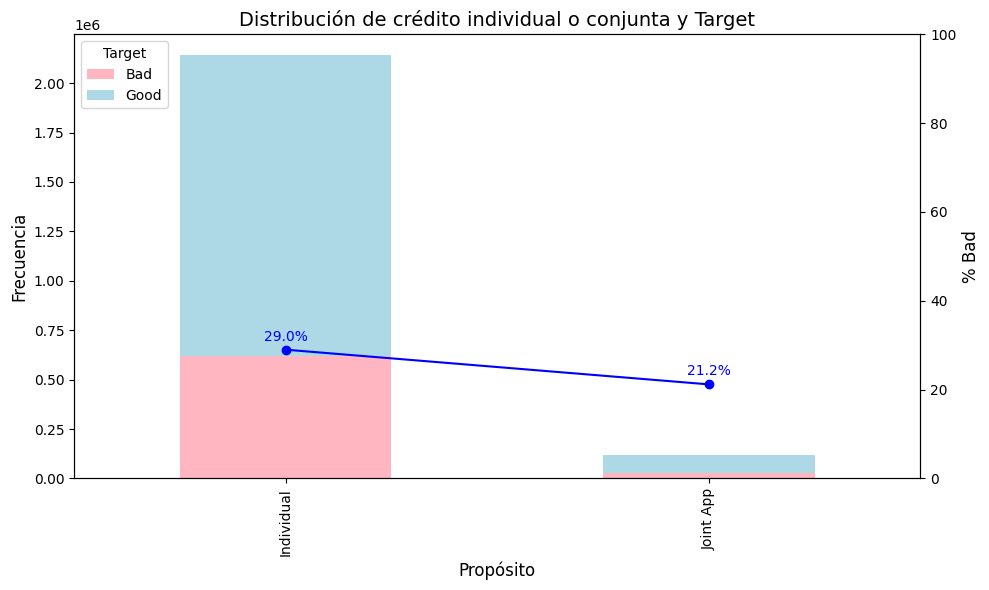

In [ ]:
# Agrupar los datos por categoría e intervalo
grouped_data = data.groupby(['application_type', 'Target']).size().unstack(fill_value=0)

# Calcular porcentajes de "bad"
grouped_data['bad_percentage'] = grouped_data['bad'] / grouped_data.sum(axis=1) * 100

# Colores pastel
colors = ['lightpink', 'lightblue']

# Crear gráfico de barras apiladas
fig, ax1 = plt.subplots(figsize=(10, 6))
grouped_data[['bad', 'good']].plot(kind='bar', stacked=True, color=colors, ax=ax1)

# Configurar ejes del gráfico de barras
ax1.set_ylabel('Frecuencia', fontsize=12)
ax1.set_xlabel('Propósito', fontsize=12)
ax1.set_title('Distribución de crédito individual o conjunta y Target', fontsize=14)
ax1.legend(['Bad', 'Good'], title='Target', loc='upper left')

# Crear un segundo eje Y para la línea de porcentaje
ax2 = ax1.twinx()
ax2.plot(grouped_data.index, grouped_data['bad_percentage'], color='blue', marker='o', label='% Bad')
ax2.set_ylabel('% Bad', fontsize=12)
ax2.set_ylim(0, 100)

# Añadir etiquetas del porcentaje en la línea
for i, txt in enumerate(grouped_data['bad_percentage']):
    ax2.text(i, txt + 2, f'{txt:.1f}%', ha='center', color='blue', fontsize=10)

# Ajustar visualización
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df["emp_length"].value_counts()

,count
emp_length,
10.0,748107
0.0,336110
2.0,203695
3.0,180830
1.0,148412
5.0,139962
4.0,136681
6.0,102689
7.0,92744


In [ ]:
def tiempo_trabajo(x):
    if x["emp_length"] >= 0 and x["emp_length"] <= 1:
        return "hasta 1 año"
    elif x["emp_length"] > 1 and x["emp_length"] <= 5:
        return "2 a 5"
    elif x["emp_length"] > 5 and x["emp_length"] <= 9:
        return "6 a 9"
    elif x["emp_length"] > 9:
        return "10 años o más"
    else:
        return "Valor inválido"  # Manejar casos no esperados


In [ ]:
data["tiempo_job"]=data.apply(lambda x: tiempo_trabajo(x),axis=1)

In [ ]:
registros_nulos = data[data['tiempo_job'].isnull()]
registros_nulos

,id_cliente,loan_status,loan_amnt,installment,term,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,delinq_2yrs,mths_since_last_delinq,total_pymnt,recoveries,collection_recovery_fee,application_type,tot_hi_cred_lim,has_job_info,has_emp_length_info,has_credit_limit_info,has_delinquency_history,Target,inter_prestamo,tiempo_job


In [ ]:
print(data['tiempo_job'].unique())


['10 años o más' '6 a 9' '2 a 5' 'hasta 1 año']


In [ ]:
data["tiempo_job"].value_counts()

,count
tiempo_job,
10 años o más,748111
2 a 5,661188
hasta 1 año,484522
6 a 9,366847


In [ ]:
data["tiempo_job"] = pd.Categorical(
    data["tiempo_job"],
    categories=["hasta 1 año", "2 a 5", "6 a 9", "10 años o más"],
    ordered=True
)

# Usar value_counts() y respetar el orden
value_counts_ordered = data["tiempo_job"].value_counts(sort=False)
value_counts_ordered

,count
tiempo_job,
hasta 1 año,484522
2 a 5,661188
6 a 9,366847
10 años o más,748111


<ipython-input-51-04d08cc87a50>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(['tiempo_job', 'Target']).size().unstack(fill_value=0)


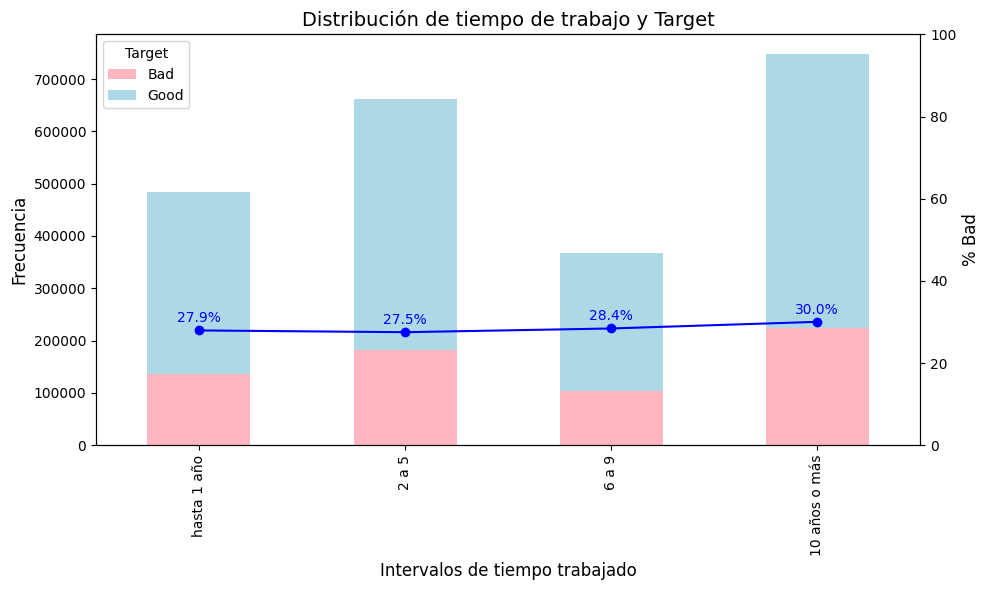

In [ ]:
# Agrupar los datos por categoría e intervalo
grouped_data = data.groupby(['tiempo_job', 'Target']).size().unstack(fill_value=0)

# Calcular porcentajes de "bad"
grouped_data['bad_percentage'] = grouped_data['bad'] / grouped_data.sum(axis=1) * 100

# Colores pastel
colors = ['lightpink', 'lightblue']

# Crear gráfico de barras apiladas
fig, ax1 = plt.subplots(figsize=(10, 6))
grouped_data[['bad', 'good']].plot(kind='bar', stacked=True, color=colors, ax=ax1)

# Configurar ejes del gráfico de barras
ax1.set_ylabel('Frecuencia', fontsize=12)
ax1.set_xlabel('Intervalos de tiempo trabajado', fontsize=12)
ax1.set_title('Distribución de tiempo de trabajo y Target', fontsize=14)
ax1.legend(['Bad', 'Good'], title='Target', loc='upper left')

# Crear un segundo eje Y para la línea de porcentaje
ax2 = ax1.twinx()
ax2.plot(grouped_data.index, grouped_data['bad_percentage'], color='blue', marker='o', label='% Bad')
ax2.set_ylabel('% Bad', fontsize=12)
ax2.set_ylim(0, 100)

# Añadir etiquetas del porcentaje en la línea
for i, txt in enumerate(grouped_data['bad_percentage']):
    ax2.text(i, txt + 2, f'{txt:.1f}%', ha='center', color='blue', fontsize=10)

# Ajustar visualización
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 26 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   id_cliente               object  
 1   loan_status              object  
 2   loan_amnt                float64 
 3   installment              float64 
 4   term                     object  
 5   emp_title                object  
 6   emp_length               float64 
 7   home_ownership           object  
 8   annual_inc               float64 
 9   verification_status      object  
 10  purpose                  object  
 11  addr_state               object  
 12  delinq_2yrs              float64 
 13  mths_since_last_delinq   float64 
 14  total_pymnt              float64 
 15  recoveries               float64 
 16  collection_recovery_fee  float64 
 17  application_type         object  
 18  tot_hi_cred_lim          float64 
 19  has_job_info             int64   
 20  has_emp_length_info     

In [ ]:
variables_categoricas = ["application_type", "emp_length", "home_ownership","purpose","addr_state", "loan_status"]

for variable in variables_categoricas:
    tabla_cruzada = pd.crosstab(data[variable], data["Target"], normalize='index') * 100
    tabla_absoluta = pd.crosstab(data[variable], data["Target"])
    tabla_cruzada['Total'] = tabla_absoluta.sum(axis=1)
    tabla_cruzada = tabla_cruzada.round(2)

    print(f"\nTabla cruzada para {variable} vs Target (%):")
    print(tabla_cruzada)


Tabla cruzada para application_type vs Target (%):
Target              bad   good    Total
application_type                       
Individual        29.00  71.00  2139958
Joint App         21.19  78.81   120710

Tabla cruzada para emp_length vs Target (%):
Target        bad    good   Total
emp_length                       
0.0         27.52   72.48  336110
1.0         28.89   71.11  148412
1.5          0.00  100.00       1
2.0         28.52   71.48  203695
2.5         37.50   62.50       8
3.0         27.43   72.57  180830
3.5         50.00   50.00       2
4.0         26.72   73.28  136681
4.5         22.22   77.78       9
5.0         26.92   73.08  139962
5.5         33.33   66.67       3
6.0         27.26   72.74  102689
6.5          0.00  100.00       5
7.0         28.15   71.85   92744
7.5         60.00   40.00       5
8.0         29.28   70.72   91981
8.5         42.86   57.14       7
9.0         29.21   70.79   79413
9.5         25.00   75.00       4
10.0        30.03   69.97  7

In [ ]:
# Ordenar los datos por el porcentaje de 'bad' en orden descendente
top_5_bad_states = crosstab_data.sort_values(by='Bad_Percentage', ascending=False).head(5)

# Mostrar los 5 estados con mayor porcentaje de 'bad'
print(top_5_bad_states[['bad', 'good', 'Bad_Percentage']])


NameError: name 'crosstab_data' is not defined

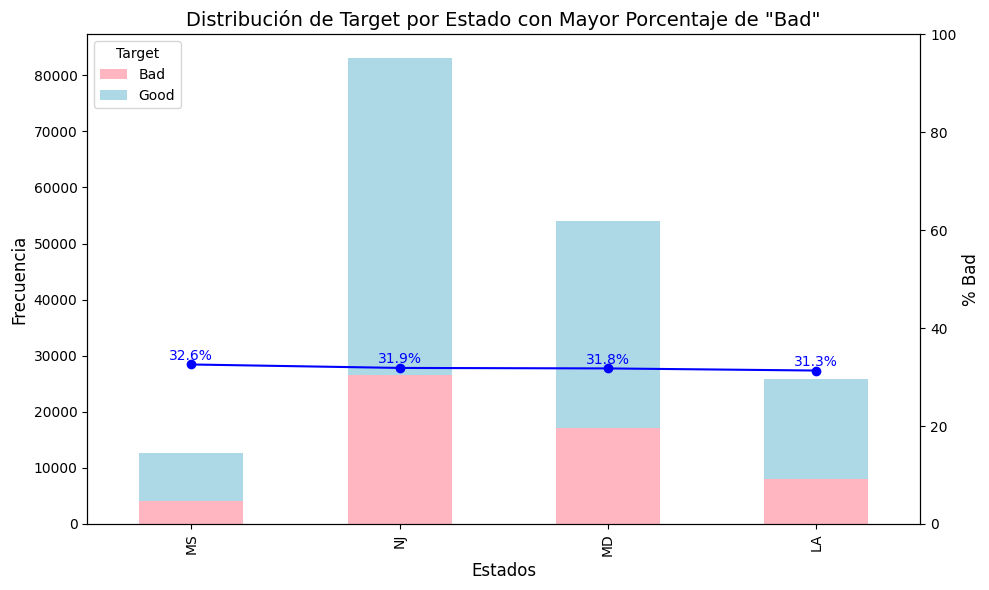

In [ ]:

# Crear la tabla cruzada
crosstab_data = pd.crosstab(data['addr_state'], data['Target'], margins=True)
crosstab_data['Bad_Percentage'] = (crosstab_data['bad'] / crosstab_data['All']) * 100

# Obtener los 5 estados con mayor porcentaje de "bad"
top_5_bad_states = crosstab_data.sort_values(by='Bad_Percentage', ascending=False).head(5)

# Crear gráfico de barras para los 5 estados con mayor porcentaje
fig, ax1 = plt.subplots(figsize=(10, 6))
top_5_bad_states[['bad', 'good']].iloc[:-1].plot(kind='bar', stacked=True, ax=ax1, color=['lightpink', 'lightblue'])

# Configurar ejes del gráfico de barras
ax1.set_ylabel('Frecuencia', fontsize=12)
ax1.set_xlabel('Estados', fontsize=12)
ax1.set_title('Distribución de Target por Estado con Mayor Porcentaje de "Bad"', fontsize=14)
ax1.legend(['Bad', 'Good'], title='Target', loc='upper left')

# Crear un segundo eje Y para la línea de porcentaje
ax2 = ax1.twinx()
ax2.plot(top_5_bad_states.index[:-1], top_5_bad_states['Bad_Percentage'][:-1], color='blue', marker='o', label='% Bad')
ax2.set_ylabel('% Bad', fontsize=12)
ax2.set_ylim(0, 100)

# Añadir etiquetas del porcentaje en la línea
for i, txt in enumerate(top_5_bad_states['Bad_Percentage'][:-1]):
    ax2.text(i, txt + 1, f'{txt:.1f}%', ha='center', color='blue', fontsize=10)

# Ajustar visualización
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df = df.copy()
#Variables financieras
df['capacidad_pago'] = ((df['loan_amnt'] / df['annual_inc']) * 100).round(4)
df['ratio_endeudamiento'] = ((df['installment'] / (df['annual_inc'] / 12)) * 100).round(4)
df['uso_credito'] = ((df['loan_amnt'] / df['tot_hi_cred_lim']) * 100).round(4)
df['tasa_recuperacion'] = ((df['recoveries'] / df['loan_amnt']) * 100).round(4)

# #Variables de Comportamiento
# df['endeudamiento'] = (df['capacidad_pago'] > df['capacidad_pago'].median()).astype(int)
# df['alta_utilizacion'] = (df['uso_credito'] > 0.8).astype(int)
# df['morosidad_reciente'] = ((df['mths_since_last_delinq'] <= 6) & (df['mths_since_last_delinq'] >= 0)).astype(int)
# df['score_riesgo'] = df['endeudamiento'] + df['alta_utilizacion'] + df['morosidad_reciente']
# df['endeudamiento'] = df['endeudamiento'].astype(str)
# df['alta_utilizacion'] = df['alta_utilizacion'].astype(str)
# df['morosidad_reciente'] = df['morosidad_reciente'].astype(str)
# df['score_riesgo'] = df['score_riesgo'].astype(str)

In [ ]:
df['endeudamiento'] = (df['capacidad_pago'] > df['capacidad_pago'].median()).astype(int)
df['alta_utilizacion'] = (df['uso_credito'] > 0.8).astype(int)
df['morosidad_reciente'] = ((df['mths_since_last_delinq'] <= 6) & (df['mths_since_last_delinq'] >= 0)).astype(int)
df['score_riesgo'] = df['endeudamiento'] + df['alta_utilizacion'] + df['morosidad_reciente']
df['endeudamiento'] = df['endeudamiento'].astype(str)
df['alta_utilizacion'] = df['alta_utilizacion'].astype(str)
df['morosidad_reciente'] = df['morosidad_reciente'].astype(str)
df['score_riesgo'] = df['score_riesgo'].astype(str)

In [ ]:
#Mostrar distribuciones de las variables cuanlitativas
for column in data.select_dtypes(include=['object']).columns:
  print(f"\nVariable: {column}")
  value_counts = data[column].value_counts()
  percentage = (value_counts / len(data)) * 100
  df_counts = pd.concat([value_counts, percentage.round(1)], axis=1)
  df_counts.columns = ['Count', 'Percentage']
  print(df_counts)


Variable: id_cliente
            Count  Percentage
id_cliente                   
0               1         0.0
1507114         1         0.0
1507108         1         0.0
1507109         1         0.0
1507110         1         0.0
...           ...         ...
753550          1         0.0
753549          1         0.0
753548          1         0.0
753547          1         0.0
2260667         1         0.0

[2260668 rows x 2 columns]

Variable: loan_status
                                                      Count  Percentage
loan_status                                                            
Fully Paid                                          1041952        46.1
Current                                              919695        40.7
Charged Off                                          261655        11.6
Late (31-120 days)                                    21897         1.0
In Grace Period                                        8952         0.4
Late (16-30 days)                

In [ ]:
variables_categoricas = ["loan_status", "verification_status","home_ownership", "term", "Target", "addr_state"]

for variable in variables_categoricas:
    tabla_cruzada = pd.crosstab(df[variable], df["score_riesgo"], normalize='index') * 100
    tabla_absoluta = pd.crosstab(df[variable], df["score_riesgo"])
    tabla_cruzada['Total'] = tabla_absoluta.sum(axis=1)
    tabla_cruzada = tabla_cruzada.round(2)

    print(f"\nTabla cruzada para {variable} vs score_riesgo (%):")
    print(tabla_cruzada)


Tabla cruzada para loan_status vs score_riesgo (%):
score_riesgo                                           0      1      2     3  \
loan_status                                                                    
Charged Off                                         0.28  37.61  59.81  2.30   
Current                                             0.66  47.23  50.69  1.41   
Default                                             3.23  41.94  51.61  3.23   
Does not meet the credit policy. Status:Charged...  0.53  67.15  31.01  1.31   
Does not meet the credit policy. Status:Fully Paid  0.75  72.28  26.56  0.40   
Fully Paid                                          0.74  51.56  46.23  1.46   
In Grace Period                                     0.36  39.22  57.88  2.55   
Late (16-30 days)                                   0.64  40.89  56.38  2.09   
Late (31-120 days)                                  0.33  39.71  57.79  2.16   

score_riesgo                                          Total  
loan

In [ ]:
d2=df['']

In [ ]:
variables_categoricas = ["loan_status", "verification_status","home_ownership", "term"]

for variable in variables_categoricas:
    tabla_cruzada = pd.crosstab(df[variable], df["score_riesgo"], normalize='index') * 100
    tabla_absoluta = pd.crosstab(df[variable], df["score_riesgo"])
    tabla_cruzada['Total'] = tabla_absoluta.sum(axis=1)
    tabla_cruzada = tabla_cruzada.round(2)

    print(f"\nTabla cruzada para {variable} vs score_riesgo (%):")
    print(tabla_cruzada)

In [ ]:
df

,id_cliente,loan_status,loan_amnt,installment,term,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,delinq_2yrs,mths_since_last_delinq,total_pymnt,recoveries,collection_recovery_fee,application_type,tot_hi_cred_lim,has_job_info,has_emp_length_info,has_credit_limit_info,has_delinquency_history,Target,inter_prestamo,tiempo_job,capacidad_pago,ratio_endeudamiento,uso_credito,tasa_recuperacion
0,0,Current,2500.0,84.92,36 months,Chef,10.0,RENT,55000.0,Not Verified,debt_consolidation,NY,0.0,227.0,167.020000,0.0,0.0,Individual,60124.0,1,1,1,0,good,[0.5 a 10),10 años o más,4.5455,1.8528,4.1581,0.0
1,1,Current,30000.0,777.23,60 months,Postmaster,10.0,MORTGAGE,90000.0,Source Verified,debt_consolidation,LA,0.0,227.0,1507.110000,0.0,0.0,Individual,372872.0,1,1,1,0,good,más de 30,10 años o más,33.3333,10.3631,8.0457,0.0
2,2,Current,5000.0,180.69,36 months,Administrative,6.0,MORTGAGE,59280.0,Source Verified,debt_consolidation,MI,0.0,227.0,353.890000,0.0,0.0,Individual,136927.0,1,1,1,0,good,[0.5 a 10),6 a 9,8.4345,3.6577,3.6516,0.0
3,3,Current,4000.0,146.51,36 months,IT Supervisor,10.0,MORTGAGE,92000.0,Source Verified,debt_consolidation,WA,0.0,227.0,286.710000,0.0,0.0,Individual,385183.0,1,1,1,0,good,[0.5 a 10),10 años o más,4.3478,1.9110,1.0385,0.0
4,4,Current,30000.0,731.78,60 months,Mechanic,10.0,MORTGAGE,57250.0,Not Verified,debt_consolidation,MD,0.0,227.0,1423.210000,0.0,0.0,Individual,157548.0,1,1,1,0,good,más de 30,10 años o más,52.4017,15.3386,19.0418,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260663,2260663,Current,12000.0,279.72,60 months,house keeper,10.0,MORTGAGE,58000.0,Not Verified,debt_consolidation,VT,0.0,227.0,5360.960000,0.0,0.0,Individual,73948.0,1,1,1,0,good,[10 a 20),10 años o más,20.6897,5.7873,16.2276,0.0
2260664,2260664,Fully Paid,12000.0,358.01,60 months,Skilled Labor,0.0,MORTGAGE,30000.0,Not Verified,debt_consolidation,OR,3.0,13.0,14499.802172,0.0,0.0,Joint App,382275.0,1,1,1,1,bad,[10 a 20),hasta 1 año,40.0000,14.3204,3.1391,0.0
2260665,2260665,Current,10000.0,332.10,36 months,Teacher,10.0,OWN,64000.0,Source Verified,debt_consolidation,IL,0.0,227.0,5306.940000,0.0,0.0,Individual,203417.0,1,1,1,0,good,[10 a 20),10 años o más,15.6250,6.2269,4.9160,0.0
2260666,2260666,Current,12000.0,327.69,60 months,UNKNOWN_OCCUPATION,0.0,RENT,60000.0,Not Verified,debt_consolidation,AK,2.0,7.0,5207.290000,0.0,0.0,Individual,118975.0,0,0,1,1,bad,[10 a 20),hasta 1 año,20.0000,6.5538,10.0862,0.0


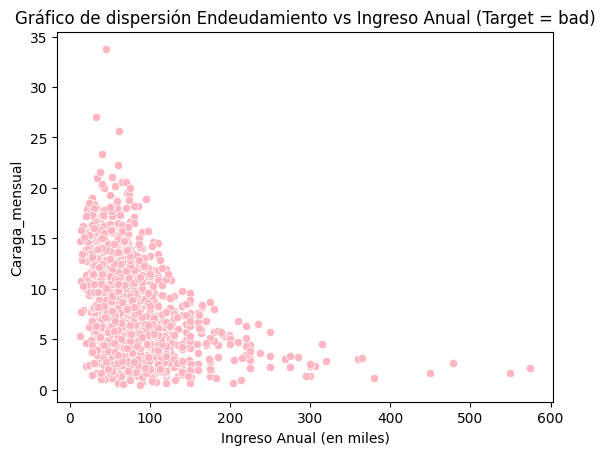

In [ ]:
# Crear una nueva columna con el ingreso anual en miles
df['annual_inc_k'] = df['annual_inc'] / 1000

# Filtrar los datos para incluir solo "bad"
data_bad_sample = df[df["Target"] == "bad"].sample(frac=0.002, random_state=42)

# Graficar los puntos con "Target = bad" en lightpink
sns.scatterplot(
    x="annual_inc_k",
    y="ratio_endeudamiento",
    data=data_bad_sample,
    color="lightpink"
)
plt.title("Gráfico de dispersión Endeudamiento vs Ingreso Anual (Target = bad)")
plt.xlabel("Ingreso Anual (en miles)")
plt.ylabel("Caraga_mensual")

# Evitar notación científica en el eje x
plt.ticklabel_format(style='plain', axis='x')

# Mostrar el gráfico
plt.show()


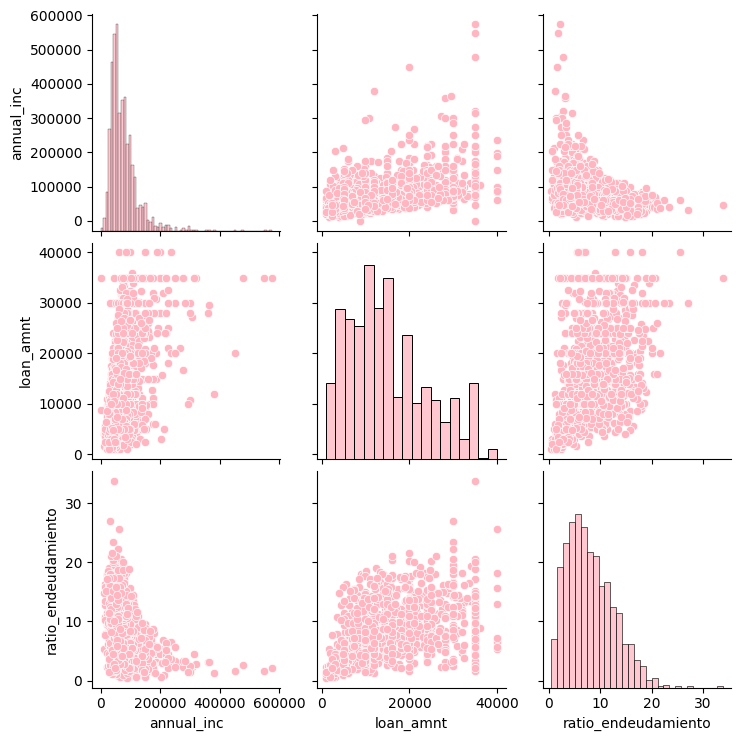

In [ ]:
# Filtrar datos "bad" y tomar una muestra del 2%
data_bad_sample = df[df["Target"] == "bad"].sample(frac=0.002, random_state=42)

# Crear el pairplot con color "lightpink" para los puntos y las barras
sns.pairplot(
    data_bad_sample,
    vars=["annual_inc", "loan_amnt", "ratio_endeudamiento"],
    plot_kws={"color": "lightpink"},  # Color de los puntos
    diag_kws={"color": "lightpink"}   # Color de las barras en la diagonal
)
sns.set(style="whitegrid")
plt.show()

In [ ]:
# Filtrar los datos donde los ingresos estén entre 10,000 y 110,000
df_filtrado = df[(df['annual_inc'] > 10000) & (df['annual_inc'] < 110000)] #en la distribucion de los clientes buenos hay valores atipicos muy altos (outliers) por lo que, no se los considero en la gráfica

# Mostrar información sobre los datos filtrados
print(f"Filas originales: {len(df)}")
print(f"Filas después del filtro: {len(df_filtrado)}")


Filas originales: 2260668
Filas después del filtro: 1872461


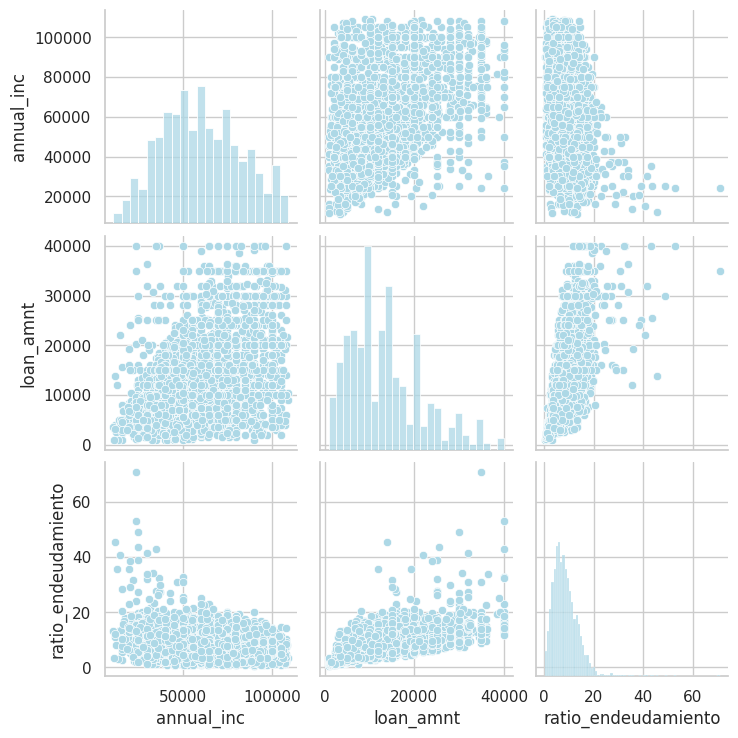

In [ ]:
# Filtrar datos "bad" y tomar una muestra del 2%
data_bad_sample = df_filtrado[df_filtrado["Target"] == "good"].sample(frac=0.002, random_state=42)

# Crear el pairplot con color "lightpink" para los puntos y las barras
sns.pairplot(
    data_bad_sample,
    vars=["annual_inc", "loan_amnt", "ratio_endeudamiento"],
    plot_kws={"color": "lightblue"},  # Color de los puntos
    diag_kws={"color": "lightblue"}   # Color de las barras en la diagonal
)
sns.set(style="whitegrid")
plt.show()

In [ ]:
# Bloques de transformaciones
financieras = ['capacidad_pago', 'carga_mensual', 'uso_credito', 'tasa_recuperacion']
comportamiento = ['endeudamiento', 'alta_utilizacion', 'morosidad_reciente', 'score_riesgo']

# Mostrar cada grupo
print("Variables financieras:")
print(df[financieras].head(10))

print("Variables de comportamiento:")
print(df[comportamiento].head(10))



Variables financieras:


KeyError: "None of [Index(['capacidad_pago', 'carga_mensual', 'uso_credito', 'tasa_recuperacion'], dtype='object')] are in the [columns]"

# Análisis Correlacional

In [ ]:
variables_categoricas = ["creditos_nuevos", "creditos_maduros","endeudamiento", "alta_utilizacion", "morosidad_reciente"]

for variable in variables_categoricas:
    tabla_cruzada = pd.crosstab(df[variable], df["score_riesgo"], normalize='index') * 100
    tabla_absoluta = pd.crosstab(df[variable], df["score_riesgo"])
    tabla_cruzada['Total'] = tabla_absoluta.sum(axis=1)
    tabla_cruzada = tabla_cruzada.round(2)

    print(f"\nTabla cruzada para {variable} vs score_riesgo (%):")
    print(tabla_cruzada)


Tabla cruzada para creditos_nuevos vs score_riesgo (%):
score_riesgo         0      1     2     3   Total
creditos_nuevos                                  
0                65.17  33.44  1.39  0.00    1292
1                42.44  50.52  6.96  0.08  646173

Tabla cruzada para creditos_maduros vs score_riesgo (%):
score_riesgo          0      1     2     3   Total
creditos_maduros                                  
0                 42.44  50.52  6.96  0.08  646201
1                 65.19  33.39  1.42  0.00    1264

Tabla cruzada para endeudamiento vs score_riesgo (%):
score_riesgo      0      1      2     3   Total
endeudamiento                                  
0              83.8  16.14   0.06  0.00  328279
1               0.0  85.81  14.02  0.17  319186

Tabla cruzada para alta_utilizacion vs score_riesgo (%):
score_riesgo          0      1      2     3   Total
alta_utilizacion                                   
0                 43.42  51.13   5.45  0.00  633549
1                  0

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()

significant_corr = []
for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > 0.5:
                significant_corr.append({
                    'var1': corr_matrix.columns[i],
                    'var2': corr_matrix.columns[j],
                    'correlation': corr_matrix.iloc[i, j]})

In [ ]:
pd.DataFrame(significant_corr)

,var1,var2,correlation
0,installment,loan_amnt,0.945967
1,total_pymnt,loan_amnt,0.648544
2,total_pymnt,installment,0.634198
3,collection_recovery_fee,recoveries,0.966304
4,has_next_payment,has_cr_history,1.000000
5,has_last_pymnt_d,has_cr_history,1.000000
6,has_last_pymnt_d,has_next_payment,1.000000
7,has_emp_length_info,has_job_info,0.940328
8,has_delinquency_history,delinq_2yrs,0.583602
9,has_delinquency_history,mths_since_last_delinq,0.756363


In [ ]:
from scipy.stats import chi2_contingency
categorical_cols = df.select_dtypes(include=['object']).columns
chi_square_results = {}
Target = 'Target'
for col in categorical_cols:
        contingency_table = pd.crosstab(df[col], df[Target])
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)

        chi_square_results[col] = {
            'chi2': chi2,
            'p_value': p_value,
            'degrees_of_freedom': dof}
pd.DataFrame(chi_square_results).T

,chi2,p_value,degrees_of_freedom
id_cliente,0.0,1.0,0.0
loan_status,0.0,1.0,0.0
term,0.0,1.0,0.0
emp_title,0.0,1.0,0.0
home_ownership,0.0,1.0,0.0
verification_status,0.0,1.0,0.0
purpose,0.0,1.0,0.0
addr_state,0.0,1.0,0.0
settlement_status,0.0,1.0,0.0
application_type,0.0,1.0,0.0


In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
# Correlación con target
target_correlations = {}
for col in numeric_cols:
        if col != Target:
            correlation = df[col].corr(df[Target])
            target_correlations[col] = abs(correlation)
pd.Series(target_correlations).sort_values(ascending=False)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


,0
loan_amnt,NaN
installment,NaN
emp_length,NaN
annual_inc,NaN
delinq_2yrs,NaN
mths_since_last_delinq,NaN
total_pymnt,NaN
recoveries,NaN
collection_recovery_fee,NaN
tot_hi_cred_lim,NaN
